In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [42]:
user = pd.read_csv('../Data/whyout_data/user.csv') # shape(31178,13), user idx에서 2354개가 비어있음
place = pd.read_csv('../Data/whyout_data/place.csv') # shape(4697,10), place idx에서 23개가 비어있음
product = pd.read_csv('../Data/whyout_data/product.csv') # shape(5834,11), product idx에서 538개가 비어있음
video = pd.read_csv('../Data/whyout_data/video.csv') # shape(3250, 9), video idx에서 315개가 비어있음
user_place = pd.read_csv('../Data/whyout_data/user_place.csv') # shape (31176,4697) 유저 x 장소 아이템 # 8756명이 장소를 평가하지 않음
user_product = pd.read_csv('../Data/whyout_data/user_product.csv') # shape(31176,5834) 유저 x 상품 아이템
user_video = pd.read_csv('../Data/whyout_data/user_video.csv') # shape (31177, 3250) 유저 x 영상 아이템
index_user_place = pd.read_csv('../Data/whyout_data/index_user_place.csv', index_col=0)
index_user_product = pd.read_csv('../Data/whyout_data/index_user_product.csv', index_col=0)
index_user_video = pd.read_csv('../Data/whyout_data/index_user_video.csv', index_col=0)
normal_user_place = pd.read_csv('../Data/whyout_data/normal_user_place.csv', index_col=0)
normal_user_product = pd.read_csv('../Data/whyout_data/normal_user_product.csv', index_col=0)
normal_user_video = pd.read_csv('../Data/whyout_data/normal_user_video.csv', index_col=0)

In [43]:
normal_user_place

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.4687,0.4688,0.4689,0.4690,0.4691,0.4692,0.4693,0.4694,0.4695,0.4696
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.666667,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31171,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31172,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31173,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31174,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
# # 나이 이상한 값 찾기
# find_user_nan = user.index[user['나이'].isna() | (user['나이'] >= 100) | (user['나이'] <= 0)].tolist()

# #print(find_user_nan)
# print('전체 user 수:',len(user))
# print('나이가 이상한 user 수:',len(find_user_nan))

전체 user 수: 31178
나이가 이상한 user 수: 1335


Age Group
유아       286
10대       77
20대     5683
30대    15291
40대     7286
50대     1251
60대      219
70대       30
80대        1
Name: count, dtype: int64


C:\Users\user\AppData\Local\Temp\ipykernel_11536\2076071389.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age Group'] = pd.cut(df['나이'], bins=bins, labels=labels, right=False)


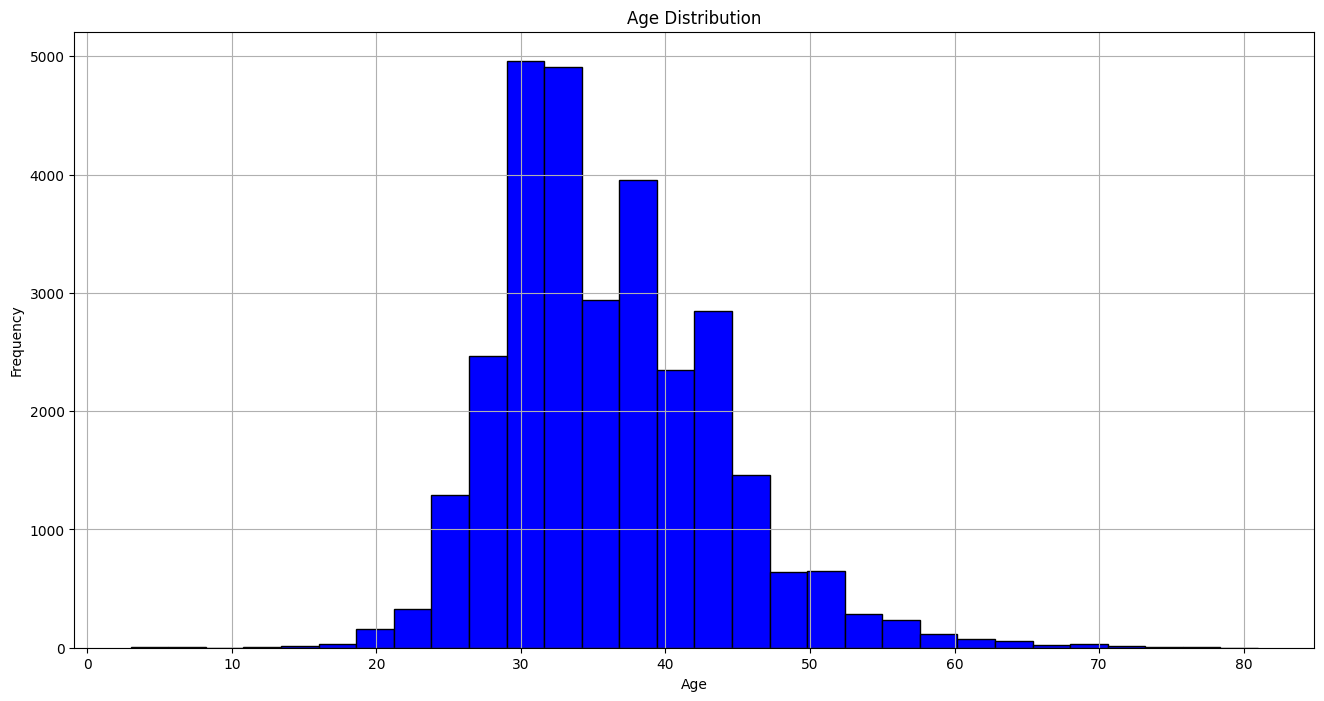

In [61]:
# # 나이 그룹 분포 확인
# df = user
# df = df.dropna(subset=['나이'])
# bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
# labels = ['유아', '10대', '20대', '30대', '40대', '50대', '60대', '70대', '80대']

# df['Age Group'] = pd.cut(df['나이'], bins=bins, labels=labels, right=False)
# age_group_distribution = df['Age Group'].value_counts().sort_index()

# # Display the result
# print(age_group_distribution)
# df = df[(df['나이'] > 0) & (df['나이'] < 100)]
# plt.figure(figsize=(16, 8))
# plt.hist(df['나이'], bins=30, color='blue', edgecolor='black')
# plt.title('Age Distribution')
# plt.xlabel('Age')
# plt.ylabel('Frequency')
# plt.grid(True)
# plt.show()
# # df.to_csv('age_group_distribution.csv', encoding='utf-8-sig')

In [24]:
# 사용자의 평가 유무 확인
def find_zero_indices(df):
    return df.index[df.eq(0).all(axis=1)].tolist()

place_zero_indices = find_zero_indices(user_place)
product_zero_indices = find_zero_indices(user_product)
video_zero_indices = find_zero_indices(user_video)

common_zero_indices = set(place_zero_indices) & set(product_zero_indices) & set(video_zero_indices)
place_product_zero_indices = set(place_zero_indices) & set(product_zero_indices)
place_video_zero_indices = set(place_zero_indices) & set(video_zero_indices)
product_video_zero_indices = set(product_zero_indices) & set(video_zero_indices)

print('장소를 평가하지 않은 사용자 수:',len(place_zero_indices))
print('상품을 평가하지 않은 사용자 수:',len(product_zero_indices))
print('영상을 평가하지 않은 사용자 수:',len(video_zero_indices))
print('모두 평가하지 않은 사용자 수:',len(common_zero_indices))
#print('장소 & 상품을 같이 평가하지 않은 사용자 수:',len(place_product_zero_indices))
#print('장소 & 영상을 같이 평가하지 않은 사용자 수:',len(place_video_zero_indices))
#print('상품 & 영상을 같이 평가하지 않은 사용자 수:',len(product_video_zero_indices))

장소를 평가하지 않은 사용자 수: 8756
상품을 평가하지 않은 사용자 수: 28180
영상을 평가하지 않은 사용자 수: 20110
모두 평가하지 않은 사용자 수: 5349
장소 & 상품을 같이 평가하지 않은 사용자 수: 6002
장소 & 영상을 같이 평가하지 않은 사용자 수: 8092
상품 & 영상을 같이 평가하지 않은 사용자 수: 17276


In [6]:
# # idx missing value 찾기
# df = video.sort_values('idx')
# # 연속된 숫자 생성 (전체 범위의 시작과 끝을 기반으로)
# full_range = pd.Series(range(df['idx'].min(), df['idx'].max() + 1))
# # 누락된 숫자 찾기
# missing_numbers = full_range[~full_range.isin(df['idx'])]
# print(len(missing_numbers))

In [7]:
# # NaN 값 찾기
# nan_indices = np.where(place['주변환경'].isna())[0]
# count = 0

# if len(nan_indices) > 0:
#     print(f'총 행 수: {len(place)}, NaN 행 수: {len(nan_indices)}')
#     print("해당 열에서 NaN 값이 발견된 위치는 다음과 같습니다:")
#     for idx in nan_indices:
#         print(f"인덱스: {idx}, 값: NaN")
# else:
#     print("해당 열에 NaN 값이 없습니다.")

In [33]:
# # 행, 열 이름 생성
# new_index = [str(i+1) for i in range(user_place.shape[0])]
# user_place.index = new_index

# new_columns = [str(i+1) for i in range(user_place.shape[1])]
# user_place.columns = new_columns

# # 변경된 데이터프레임 저장
# user_place.to_csv('updated_user_place.csv', index=True, encoding='utf-8-sig') 

In [6]:
# 유저가 장소에 대한 평가 유무
# 0의 개수
# zero_count = (user_place == 0).sum(axis=1)
# total_zero_count = zero_count.sum()

# 0이 아닌 숫자의 개수
non_zero_count = (user_place != 0).sum(axis=1)
# total_non_zero_count = non_zero_count.sum()

# 장소 평가 유무
count_zero = (non_zero_count == 0).sum()
count_non_zero = (non_zero_count != 0).sum()

# print(f"0의 개수: {zero_count}")
# print(f"0의 총 개수: {total_zero_count}")
#print(f"0이 아닌 숫자의 개수: {non_zero_count}")
# print(f"0이 아닌 숫자의 총 개수: {total_non_zero_count}")
print(f"장소에 대한 평가가 없는 유저 수: {count_zero}")
print(f"장소에 대한 평가가 있는 유저 수: {count_non_zero}")

장소에 대한 평가가 없는 유저 수: 8756
장소에 대한 평가가 있는 유저 수: 22420


In [7]:
# 유저가 상품에 대한 평가 유무
# 0의 개수
# zero_count = (user_product == 0).sum(axis=1)
# total_zero_count = zero_count.sum()

# 0이 아닌 숫자의 개수
non_zero_count = (user_product != 0).sum(axis=1)
# total_non_zero_count = non_zero_count.sum()

# 상품 평가 유무
count_zero = (non_zero_count == 0).sum()
count_non_zero = (non_zero_count != 0).sum()

# print(f"0의 개수: {zero_count}")
# print(f"0의 총 개수: {total_zero_count}")
# print(f"0이 아닌 숫자의 개수: {non_zero_count}")
# print(f"0이 아닌 숫자의 총 개수: {total_non_zero_count}")
print(f"상품에 대한 평가가 없는 유저 수: {count_zero}")
print(f"상품에 대한 평가가 있는 유저 수: {count_non_zero}")

상품에 대한 평가가 없는 유저 수: 28180
상품에 대한 평가가 있는 유저 수: 2996


In [8]:
# 유저가 영상에 대한 평가 유무
# 0의 개수
# zero_count = (user_video == 0).sum(axis=1)
# total_zero_count = zero_count.sum()

# 0이 아닌 숫자의 개수
non_zero_count = (user_video != 0).sum(axis=1)
# total_non_zero_count = non_zero_count.sum()

# 영상 평가 유무
count_zero = (non_zero_count == 0).sum()
count_non_zero = (non_zero_count != 0).sum()

# print(f"0의 개수: {zero_count}")
# print(f"0의 총 개수: {total_zero_count}")
#print(f"0이 아닌 숫자의 개수: {non_zero_count}")
# print(f"0이 아닌 숫자의 총 개수: {total_non_zero_count}")
print(f"영상에 대한 평가가 없는 유저 수: {count_zero}")
print(f"영상에 대한 평가가 있는 유저 수: {count_non_zero}")

영상에 대한 평가가 없는 유저 수: 20110
영상에 대한 평가가 있는 유저 수: 11067


In [27]:
# df1 = index_user_video
# max_values = df1.max(axis=1)
# print(max_values)

0         0
1         0
2         0
3         0
4         3
         ..
31171    12
31172     0
31173     0
31174     0
31175     5
Length: 31176, dtype: int64


In [48]:
# 유저별 최대값을 구하여 그 값으로 나누어 정규화
df = index_user_place
normalized_df = df.div(df.max(axis=1), axis=0)
normalized_df.fillna(0, inplace=True)
#print(normalized_df.head())

In [49]:
normalized_df.to_csv('normal_index_user_place.csv')